In [3]:
import os
import json
import numpy as np
import cv2 as cv    
import matplotlib.pyplot as plt
import os

In [4]:
# Create dictionary whit classes and their pixel count
def get_classes_dict():
    classes = {}

    with open('obj_class_to_machine_color.json') as f:
        classes_dict = json.load(f)

    for x in classes_dict:
        classes[x] = 0

    return classes

In [5]:
def calculate_pixel_distribution(resize_shape=None, num_classes=37):
    # Load class names
    classes_pixel_count = get_classes_dict()
    class_names = list(classes_pixel_count.keys()) # Zodat ik de index kan gebruiken om de class te vinden

    total_pixels = 0

    # Mask data directory
    data_dir_path = 'dataset/masks/'
    data_dir = os.listdir(data_dir_path)

    for mask in data_dir:
        mask_path = os.path.join(data_dir_path, mask)
        
        # Load mask
        mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE) 

        if resize_shape is not None:
            mask = cv.resize(mask, resize_shape, interpolation=cv.INTER_NEAREST)

        # Get unique classes in mask 
        classes = np.unique(mask) 
        total_pixels += mask.size

        for cls in classes:
            # Skip background class
            if cls == 0:
                continue

            pixel_count = (mask == cls).sum()

            class_name = class_names[cls-1]

            classes_pixel_count[class_name] += int(pixel_count)

    return classes_pixel_count, total_pixels

In [6]:
def plot_histogram(class_pixel_dict, total_pixels, title, total_images=492):
    class_pixel_dict = dict(sorted(class_pixel_dict.items(), key=lambda item: item[1], reverse=True)) # Sorteer op pixel count

    classes = list(class_pixel_dict.keys()) # Klassen
    pixel_counts = list(class_pixel_dict.values()) # Aantal pixels per klasse

    # Belangrijke klassen
    important_classes = [
        'Ionic kyma decoration', 
        'Lesbian kyma decoration', 
        'Bead-and-reel (double double)', 
        'Scroll pattern (large)', 
        'Anthemion (large & capital & pulvinus)', 
        'Anthemion (small & soffit & top moulding architrave)', 
        'Acanthus leaves (solo) (capital & frieze & modillion)'
    ]

    colors = ['skyblue' if cls not in important_classes else 'palegreen' for cls in classes]

    # Maak histogram
    plt.figure(figsize=(14, 8))
    plt.bar(classes, pixel_counts, color=colors, edgecolor='black')
    
    # Add labels and title
    plt.xlabel('Classes', fontsize=14, labelpad=10)
    plt.ylabel('Pixel percentage', fontsize=14, labelpad=10)

    plt.title(f'{title} (Total Images: {total_images})', fontsize=16, pad=20)
    
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate class labels for better visibility
    plt.yticks([])
    
    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate bars with percentage of total pixel count
    for i, count in enumerate(pixel_counts):
        percentage = float(count / total_pixels) * 100
        plt.text(i + 0.1, count + total_pixels * 0.001, f'{percentage:.2f}%', ha='center', fontsize=7, color='black')
    
    # Display the plot
    plt.tight_layout()
    plt.savefig(f'{title}.png', dpi=300)
    plt.show()

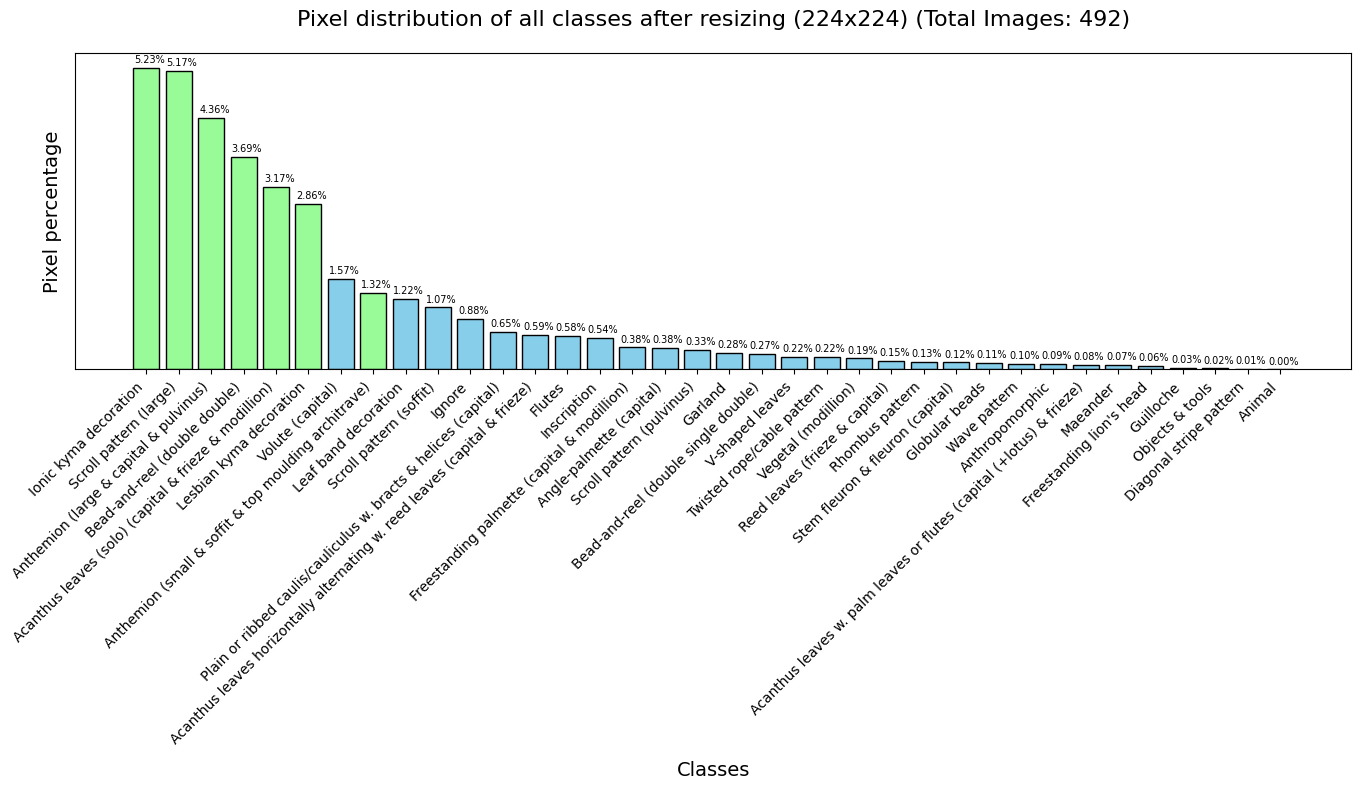

In [7]:
classes_pixel_count, total_pixels = calculate_pixel_distribution(resize_shape=(224,224), num_classes=37)

plot_histogram(classes_pixel_count, total_pixels, 'Pixel distribution of all classes after resizing (224x224)') 

In [8]:
# Print percentage of background pixels
pixel_counts = list(classes_pixel_count.values())
total_precentage = 0
for count in pixel_counts:
    percentage = (count / total_pixels) * 100
    total_precentage += percentage

print(f"The percentage background pixels: {100-total_precentage} %")

The percentage background pixels: 63.83979611280487 %


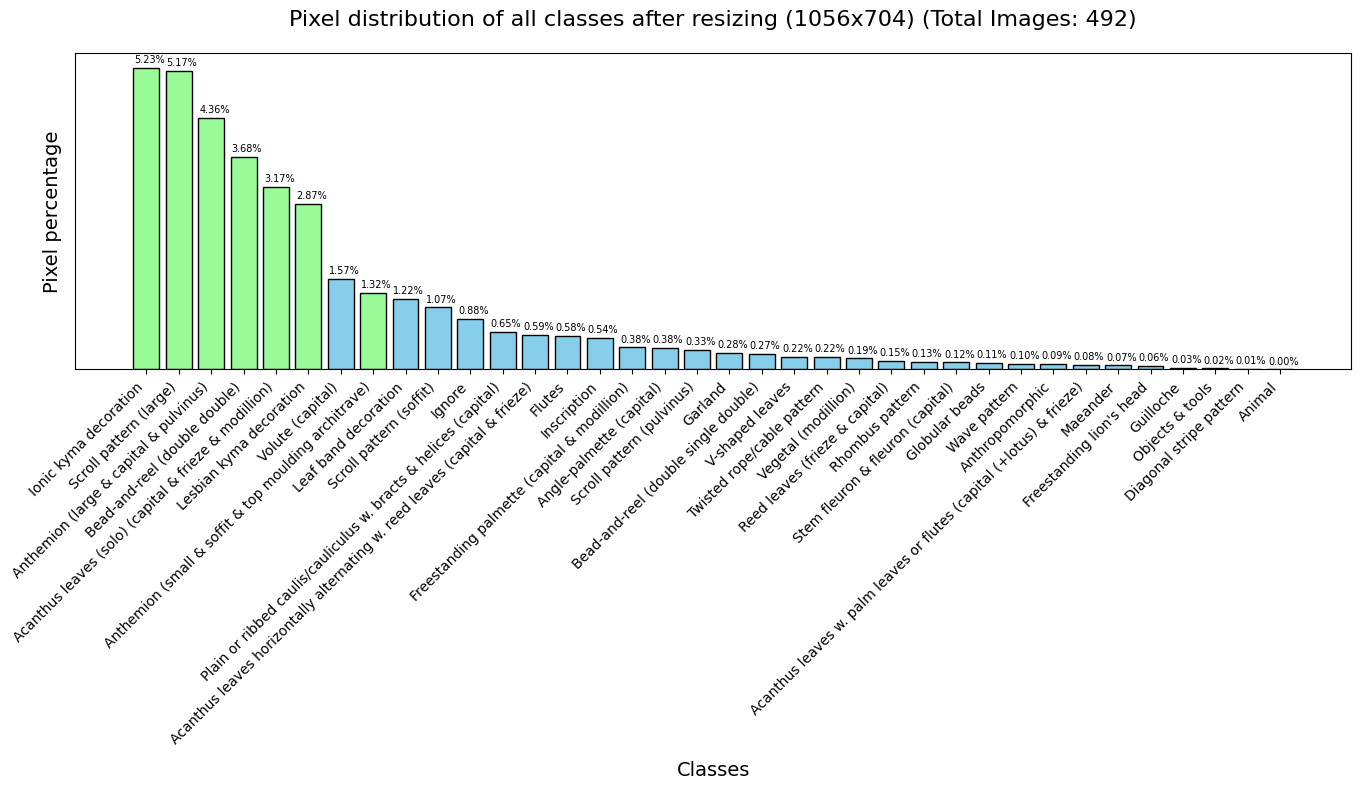

In [9]:
classes_pixel_count, total_pixels = calculate_pixel_distribution(resize_shape=(1056, 704), num_classes=37)

plot_histogram(classes_pixel_count, total_pixels, 'Pixel distribution of all classes after resizing (1056x704)') 

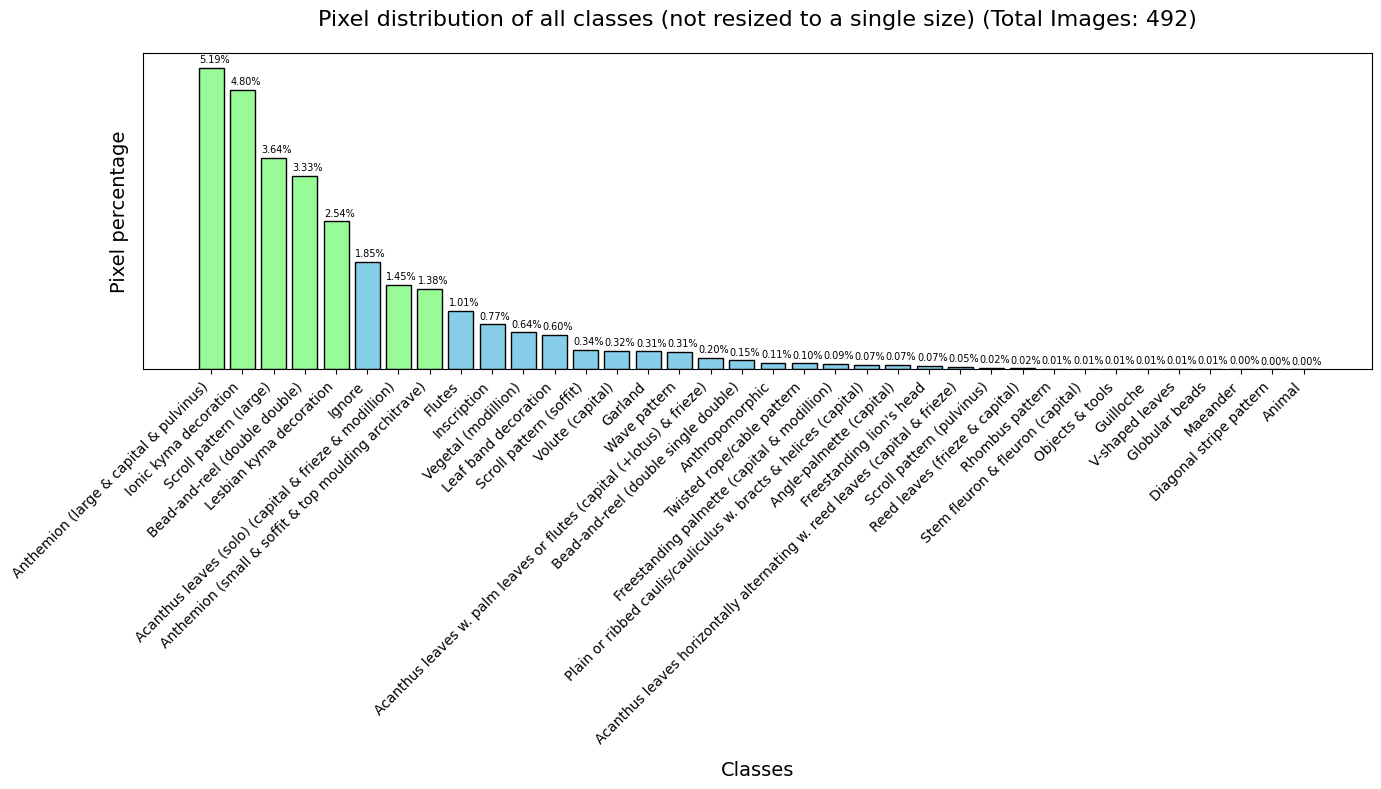

In [10]:
classes_pixel_count, total_pixels = calculate_pixel_distribution()

plot_histogram(classes_pixel_count, total_pixels, 'Pixel distribution of all classes (not resized to a single size)') 

In [11]:
# Print percentage of background pixels
pixel_counts = list(classes_pixel_count.values())
total_precentage = 0
for count in pixel_counts:
    percentage = (count / total_pixels) * 100
    total_precentage += percentage

print(f"The percentage background pixels: {100-total_precentage} %")

The percentage background pixels: 70.51761622196648 %
